In [ ]:
"""
Initial setup:
1) create virtualenv project using pycharm

2) install the following libraries to virtualenv:
pip install numpy
pip install pandas
pip install requests
pip install beautifulsoup4
pip install lxml
"""

In [7]:
import requests  # library to send requests to web site(krisha.kz)
from bs4 import BeautifulSoup as bs  # library to copy all html-code
import csv  # library to write info to csv
import pandas as pd  # to convert csv to pandas DataFrame
import numpy as np  # to work np. arrays
import time
import math
import re
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Kaspi.csv')

In [4]:
df.head()

,brand,color,full_name,price,rating
0,Lenovo,серый,Lenovo V14-ADA 82C6S03900,184800,297.0
1,Leap,белый,Leap T304 PT00070,97520,175.0
2,Apple,серый,Apple MacBook Air 13 MGN63,547250,311.0
3,Apple,серый,Apple MacBook Pro 13 MYD82,628550,137.0
4,Acer,черный,Acer Aspire 5 A515-45G NX.A8EER.00A,319990,26.0


In [5]:
df.shape

(1368, 5)

In [6]:
df1 = df.groupby(['brand']).size().reset_index(name='count')
df1.sort_values(by=['count'], inplace=True)
df1

,brand,count
17,KUULAA,1
31,YAYA,1
2,Aiwa,1
5,Aсer,1
28,Qmax,1
25,Microsoft,1
10,Digma,1
20,Leen,1
30,Samsung,2
7,Colorful,2


In [8]:
df1.set_index('brand', inplace=True)

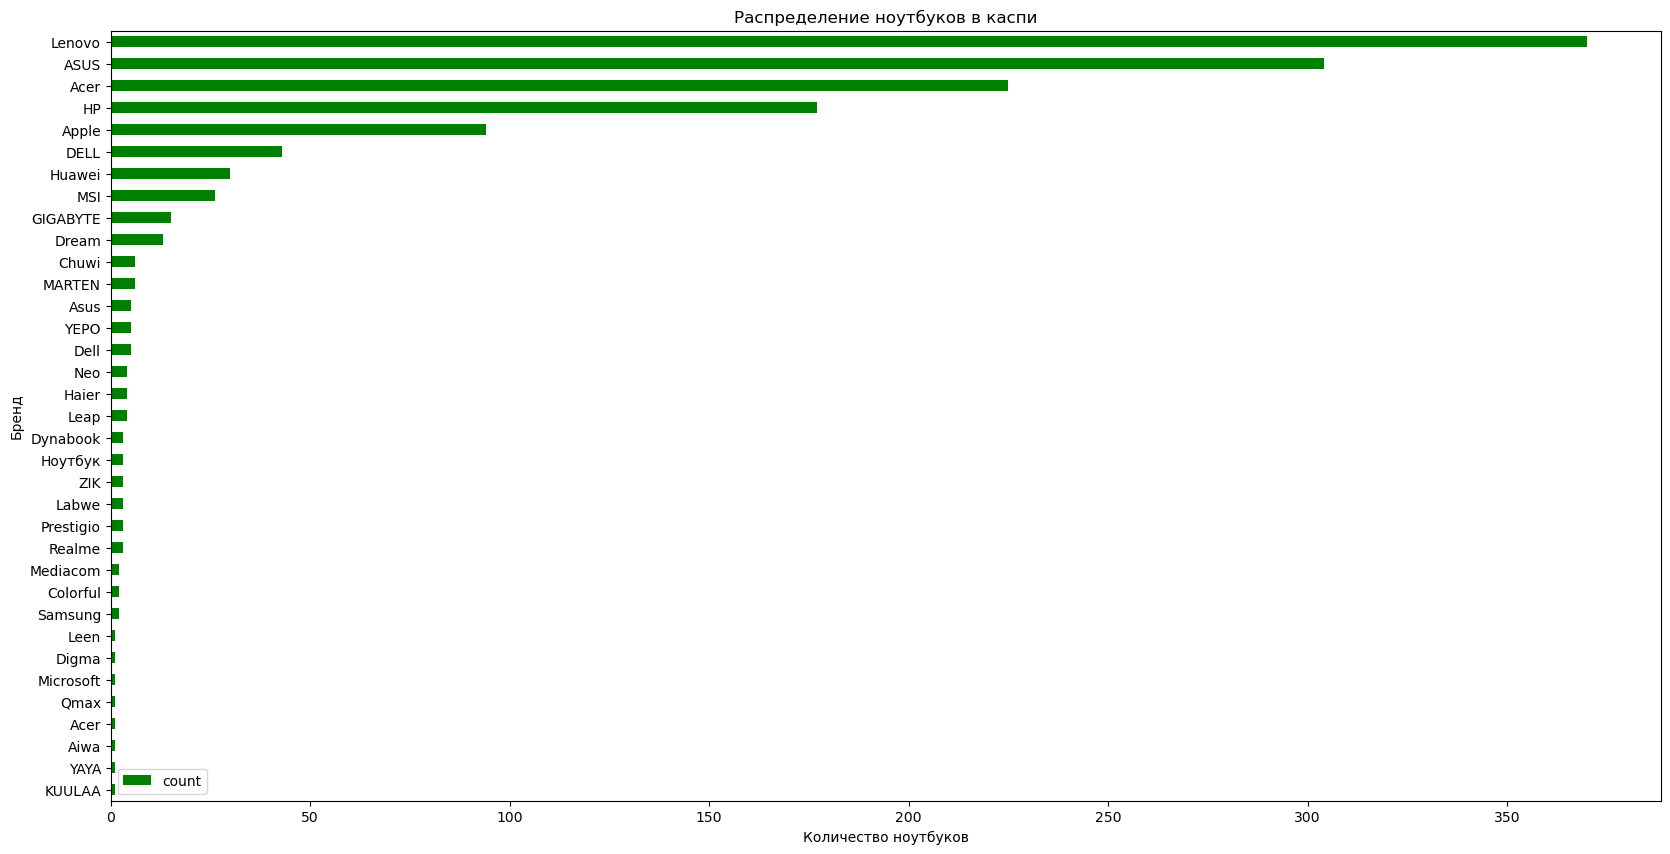

In [9]:
df1.plot(kind='barh',
         stacked=False,
         figsize=(20, 10),
         color='g',
         label=df1['count']
         )

plt.title('Распределение ноутбуков в каспи')
plt.xlabel('Количество ноутбуков')
plt.ylabel('Бренд')
plt.show()

TypeError: can only concatenate str (not "float") to str

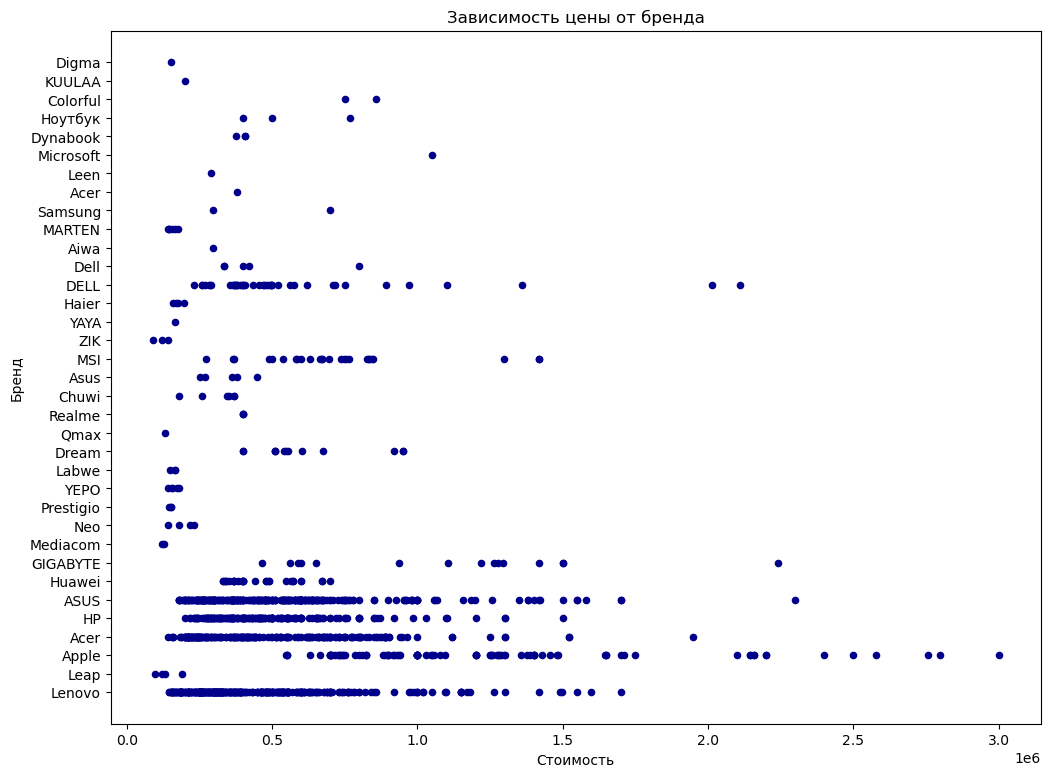

In [11]:
df2 = df.copy()
df2.plot(kind='scatter', x='price', y='brand', figsize=(12, 9), color='darkblue')

plt.title('Зависимость цены от бренда')
plt.xlabel('Стоимость')
plt.ylabel('Бренд')

x = df2['price']
y = df2['brand']
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      1368 non-null   object 
 1   color      1368 non-null   object 
 2   full_name  1368 non-null   object 
 3   price      1368 non-null   int64  
 4   rating     766 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 53.6+ KB


In [16]:
df["color"].value_counts()

серый                   486
черный                  484
серебристый             260
синий                    68
золотистый               18
белый                    11
темно-синий              10
темно-серый              10
красный                   3
коричневый                2
82K100BYRK                1
золотистый-черный         1
серебристый-черный        1
11UD-459XKZ               1
NH.QDVER.006              1
NH.QF8ER.00A              1
90NB0UY2-M02000синий      1
розовый                   1
черный-серебристый        1
82HL002ERK                1
голубой                   1
чёрный                    1
зеленый                   1
Серый                     1
NX.HE3ER.00Y              1
445G7EAсеребристый        1
Name: color, dtype: int64

In [17]:
df.sort_values(by="price", ascending=False).head()

,brand,color,full_name,price,rating
685,Apple,серый,Apple MacBook Pro 16 Z14W00105,3000000,1.0
683,Apple,серый,Apple MacBook Pro 16 Z14X000ME,2800000,NaN
364,Apple,серебристый,Apple MacBook Pro 14 Z15K0010J,2759000,NaN
871,Apple,серебристый,Apple MacBook Pro 16 Z150000HP,2580000,NaN
682,Apple,серый,Apple MacBook Pro 14 Z15G000DG,2500000,NaN


In [32]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', '{:.2f}'.format)
df["price"].describe()

count      1368.00
mean     545096.75
std      370598.55
min       89900.00
25%      295990.00
50%      449990.00
75%      660194.50
max     3000000.00
Name: price, dtype: float64

In [33]:
df[df["brand"] == "Apple"]["price"].describe()

count        94.00
mean    1238499.77
std      559451.83
min      547250.00
25%      822990.00
50%     1053995.00
75%     1400000.00
max     3000000.00
Name: price, dtype: float64

In [36]:
df[(df["brand"] == "Apple") & (df["rating"] > 100)]

,brand,color,full_name,price,rating
2,Apple,серый,Apple MacBook Air 13 MGN63,547250,311.00
3,Apple,серый,Apple MacBook Pro 13 MYD82,628550,137.00
6,Apple,серебристый,Apple MacBook Air 13 MGN93,552600,133.00
7,Apple,золотистый,Apple MacBook Air 13 MGND3,549990,151.00


In [37]:
df.sort_values(by="rating", ascending=False).head()

,brand,color,full_name,price,rating
2,Apple,серый,Apple MacBook Air 13 MGN63,547250,311.00
0,Lenovo,серый,Lenovo V14-ADA 82C6S03900,184800,297.00
1,Leap,белый,Leap T304 PT00070,97520,175.00
7,Apple,золотистый,Apple MacBook Air 13 MGND3,549990,151.00
3,Apple,серый,Apple MacBook Pro 13 MYD82,628550,137.00


In [39]:
df.loc[0:3, "brand":"color"]

,brand,color
0,Lenovo,серый
1,Leap,белый
2,Apple,серый
3,Apple,серый


In [42]:
df.iloc[0:4, 0:2]

,brand,color
0,Lenovo,серый
1,Leap,белый
2,Apple,серый
3,Apple,серый


In [52]:
df[-1:] # last row

,brand,color,full_name,price,rating
1367,Lenovo,серый,Lenovo IdeaPad 3 15ALC6 82KU01S5RK,337990,NaN


In [53]:
df.apply(np.max)

brand                          Ноутбук
color                           чёрный
full_name    Ноутбук HP 250 G8 3A5T7EA
price                          3000000
rating                          311.00
dtype: object

In [55]:
df.apply(func=np.max, axis=1)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [57]:
df[df["full_name"].apply(lambda name: "MacBook Air" in name)] # only airs

,brand,color,full_name,price,rating
2,Apple,серый,Apple MacBook Air 13 MGN63,547250,311.00
6,Apple,серебристый,Apple MacBook Air 13 MGN93,552600,133.00
7,Apple,золотистый,Apple MacBook Air 13 MGND3,549990,151.00
21,Apple,черный,Apple MacBook Air 13 MLY33,698990,11.00
58,Apple,серый,Apple MacBook Air 13 MLXW3,699209,8.00
65,Apple,черный,Apple MacBook Air 13 MLY43,881065,1.00
88,Apple,золотистый,Apple MacBook Air 13 MLY13,702287,6.00
91,Apple,серый,Apple MacBook Air 13 MLXX3,886868,1.00
117,Apple,серый,Apple MacBook Air 13 MGN73,716620,46.00
118,Apple,серебристый,Apple MacBook Air 13 Z12700034,809980,1.00
